In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import os

In [2]:
!pwd

/home/dsc/TFM/repositorio


In [3]:
data_root = "/home/dsc/TFM/repositorio/"

In [4]:
columns = ['user_id', 'rating', 'comida']
datafile = os.path.join(data_root, "Encuesta_vf.csv")
data = pd.read_csv(datafile, sep=';', header =0, names=columns)
data.head()

,user_id,rating,comida
0,28,2,tirabusones con atun y verduras
1,29,1,tirabusones con atun y verduras
2,219,2,tirabusones con atun y verduras
3,305,4,tirabusones con atun y verduras
4,315,4,tirabusones con atun y verduras


In [5]:
n_users = data.user_id.unique().shape[0]
n_items = data.comida.unique().shape[0]
print (str(n_users) + ' users')
print (str(n_items) + ' items')

1084 users
408 items


In [6]:
p_train = 0.70 # Porcentaje de train.

data['is_train'] = np.random.uniform(0, 1, len(data)) <= p_train
train, test = data[data['is_train']==True], data[data['is_train']==False]
data = data.drop('is_train', 1)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  29029
Ejemplos usados para test:  12485


In [7]:
ratings = np.zeros((n_users, n_items))
n_rating = len(train) + len(test)
sparsity = n_rating/(ratings.shape[0] * ratings.shape[1])
sparsity *=100
print (sparsity)

9.386531365313653


In [8]:
test.head()

,user_id,rating,comida,is_train
1,29,1,tirabusones con atun y verduras,False
2,219,2,tirabusones con atun y verduras,False
5,325,4,tirabusones con atun y verduras,False
7,327,1,tirabusones con atun y verduras,False
13,488,4,tirabusones con atun y verduras,False


In [9]:
items_id = {}
food = data.comida.unique()
n = 1
for x in food:
    items_id[x] = n
    n += 1

In [10]:
items_id['Puchero']

408

In [11]:
index = list(range(len(data.index)))

In [12]:
column_items_id=[]
for x in index:
    column_items_id.append(items_id[data['comida'][x]]) 

In [13]:
data['items_id'] = column_items_id

In [15]:
data.head()

,user_id,rating,comida,items_id
0,28,2,tirabusones con atun y verduras,1
1,29,1,tirabusones con atun y verduras,1
2,219,2,tirabusones con atun y verduras,1
3,305,4,tirabusones con atun y verduras,1
4,315,4,tirabusones con atun y verduras,1


In [16]:
data_top=(data[data.rating>2])

In [17]:
data_untop=(data[data.rating<=2])

In [18]:
foodPerUser = (data_top.groupby('user_id')['items_id']
                 .apply(np.array)
                 .to_dict()
                )

In [19]:
# build the co-occurrance matrix of top of like
coMatrix = np.zeros((n_items, n_items))
for food in foodPerUser.values():
    for x in food:
        coMatrix[x-1, food-1] += 1

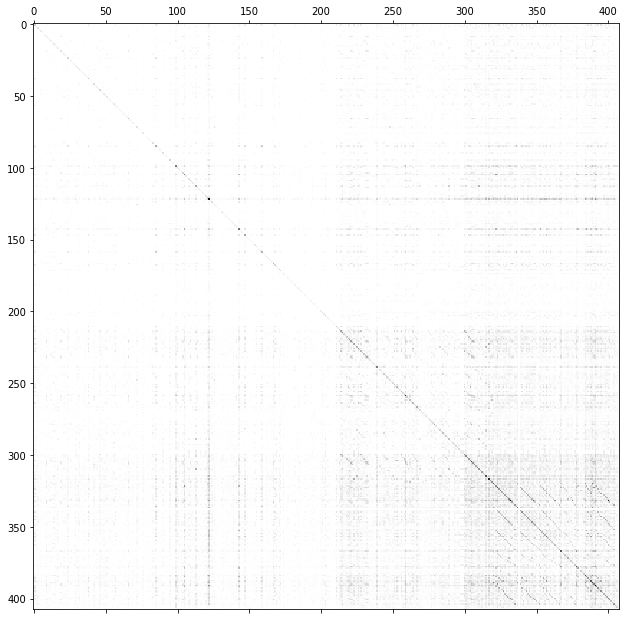

In [20]:
plt.matshow(coMatrix, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

In [21]:
foodPerUser2 = (data_untop.groupby('user_id')['items_id']
                 .apply(np.array)
                 .to_dict()
                )

In [22]:
# build the co-occurrance matrix Dislike food
coMatrix2 = np.zeros((n_items, n_items))
for food in foodPerUser2.values():
    for x in food:
        coMatrix2[x-1, food-1] += 1

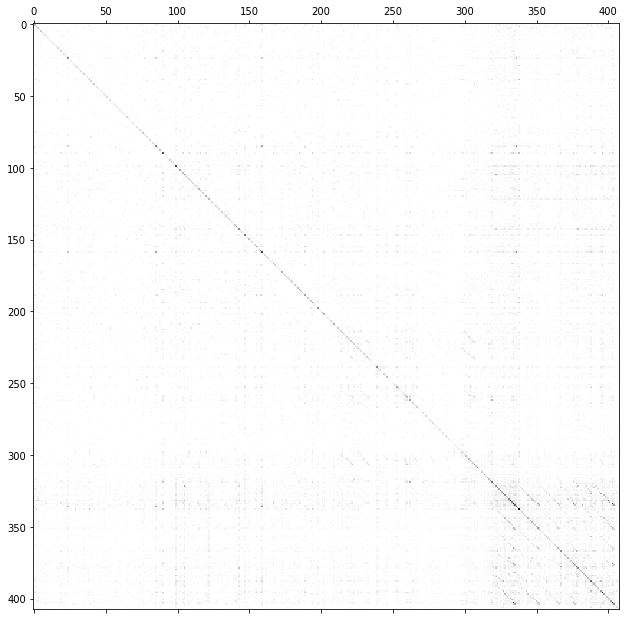

In [23]:
plt.matshow(coMatrix2, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()